In [1]:
# Cell 1: Imports
import numpy as np
import matplotlib.pyplot as plt
from scipy.spatial.distance import cdist
from ClusteringGroundTruth import cluster_gt, cluster_gt_solver
from Env import ClusteringEnvNumpy
from Plotter import PlotClustering
np.random.seed(42)

In [6]:
from TestCaseGenerator import data_RLClustering

X, M, T_P, N, d = data_RLClustering(4)

beta_min = 0.1
beta_max = 10000.0
tau = 1.1
eps = 0.99
gamma = 0.0
zeta = 1.0
T = 0.01
parametrized = True
rho = np.ones(N) / N  # Uniform weights
Y = np.mean(X, axis=0) + np.random.randn(M, 2) * 0.001



env = ClusteringEnvNumpy(
    n_data=N,
    n_clusters=M,
    n_features=d,
    parametrized=parametrized,
    eps=eps,
    gamma=gamma,
    zeta=zeta,
    T=T,
    T_p=T_P,
)

In [7]:
Y, pi, Y_list, pi_list, Betas = cluster_gt(
    X, Y, rho, env, beta_min=beta_min, beta_max=beta_max, tau=tau, verbose=True
)

beta: 0.10, distortion: 0.1829
beta: 0.11, distortion: 0.1829
beta: 0.12, distortion: 0.1829
beta: 0.13, distortion: 0.1829
beta: 0.15, distortion: 0.1829
beta: 0.16, distortion: 0.1829
beta: 0.18, distortion: 0.1829
beta: 0.19, distortion: 0.1829
beta: 0.21, distortion: 0.1829
beta: 0.24, distortion: 0.1829
beta: 0.26, distortion: 0.1829
beta: 0.29, distortion: 0.1829
beta: 0.31, distortion: 0.1829
beta: 0.35, distortion: 0.1829
beta: 0.38, distortion: 0.1829
beta: 0.42, distortion: 0.1829
beta: 0.46, distortion: 0.1829
beta: 0.51, distortion: 0.1829
beta: 0.56, distortion: 0.1829
beta: 0.61, distortion: 0.1829
beta: 0.67, distortion: 0.1829
beta: 0.74, distortion: 0.1829
beta: 0.81, distortion: 0.1829
beta: 0.90, distortion: 0.1829
beta: 0.98, distortion: 0.1829
beta: 1.08, distortion: 0.1829
beta: 1.19, distortion: 0.1829
beta: 1.31, distortion: 0.1829
beta: 1.44, distortion: 0.1829
beta: 1.59, distortion: 0.1829
beta: 1.74, distortion: 0.1829
beta: 1.92, distortion: 0.1829
beta: 2.

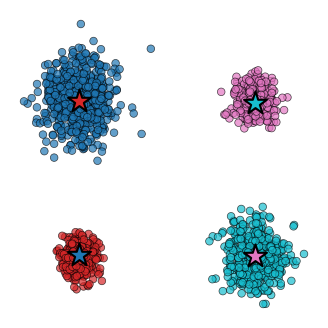

In [8]:

PlotClustering(X, Y, pi, figsize=(6, 4), save_path=None)

In [11]:
# create a scenario name that reflects all the parameters
scenario_name = f"GT_N{N}_M{M}_d{d}_betaMin{beta_min}_betaMax{beta_max}_tau{tau}_eps{eps}_gamma{gamma}_zeta{zeta}_T{T}"

In [12]:
from animator import animate_Clusters
import os

# Create animations directory if it doesn't exist
os.makedirs("animations", exist_ok=True)

animate_Clusters(
    X,
    Y_list,
    pi_list,
    Betas,
    figuresize=(6, 5),
    interval=100,
    save_path=f"animations/Clustering_{scenario_name}.gif",
)

# Save Data

In [ ]:
# import pickle
# import os

# # Create Benchmark directory if it doesn't exist
# os.makedirs("Benchmark", exist_ok=True)

# # SAVE SCENARIO RESULTS IN Benchmark Folder
# with open(f"Benchmark/{scenario_name}.pkl", "wb") as f:
#     pickle.dump((X, Y, env, pi, Y_list, pi_list, Betas), f)

# Decentralized Sensing Problem

In [ ]:
import scipy
address = f"MATLAB Codes/UTD19_London.mat"
# read as numpy array
data = scipy.io.loadmat(address)
locs = data['Xz']
# normalize locs to be in [0,1]x[0,1]
locs = (locs - np.min(locs, axis=0)) / (np.max(locs, axis=0) - np.min(locs, axis=0))
plt.plot(locs[:,0], locs[:,1], '.', color='black', markersize=2)
plt.xlim([-0.1, 1.1])
plt.ylim([-0.1, 1.1])


In [ ]:
N = locs.shape[0]
d = locs.shape[1]
M = 100

beta_min = 10.0
beta_max = 1000.0
tau = 1.1
eps = 0.0
gamma = 0.0
zeta = 1.0
T = 0.001
parametrized = True
rho = np.ones(N) / N  # Uniform weights
Y = np.random.randn(M, 2) * 0.01



env = ClusteringEnvNumpy(
    n_data=N,
    n_clusters=M,
    n_features=d,
    parametrized=parametrized,
    eps=eps,
    gamma=gamma,
    zeta=zeta,
    T=T,
    T_p=None,
)

Y, pi, Y_list, pi_list, Betas = cluster_gt(
    locs, Y, rho, env, beta_min=beta_min, beta_max=beta_max, tau=tau, verbose=True
)

In [ ]:
plt.figure(figsize=(6, 4))
plt.scatter(locs[:,0], locs[:,1], c='black', s=2)
plt.scatter(Y[:,0], Y[:,1], c='red', s=10)

# Blobs

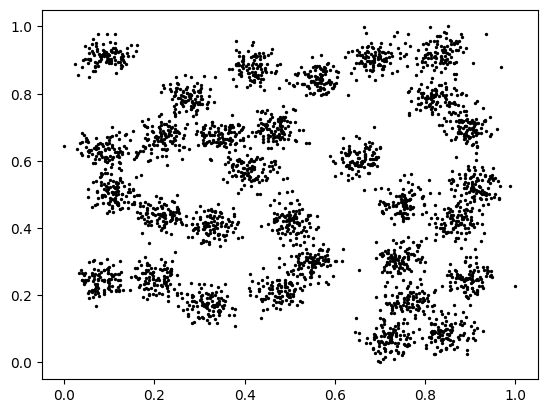

In [13]:
X = np.loadtxt("D31.txt")[:,:2]
X = (X - np.min(X, axis=0)) / (np.max(X, axis=0) - np.min(X, axis=0))
N ,d = X.shape
M = 31  # number of clusters
plt.scatter(X[:,0],X[:,1], s=2, color='black')

In [15]:
beta_min = 0.1
beta_max = 10000.0
tau = 1.1
eps = 0.99
gamma = 0.5
zeta = 1.0
T = 0.01
parametrized = True
rho = np.ones(N) / N  # Uniform weights
Y = np.mean(X, axis=0) + np.random.randn(M, 2) * 0.001



env = ClusteringEnvNumpy(
    n_data=N,
    n_clusters=M,
    n_features=d,
    parametrized=parametrized,
    eps=eps,
    gamma=gamma,
    zeta=zeta,
    T=T,
    T_p=None,
)
Y, pi, Y_list, pi_list, Betas = cluster_gt(
    X, Y, rho, env, beta_min=beta_min, beta_max=beta_max, tau=tau, verbose=True
)

beta: 0.10, distortion: 0.0981
beta: 0.11, distortion: 0.0981
beta: 0.12, distortion: 0.0978
beta: 0.13, distortion: 0.0978
beta: 0.15, distortion: 0.0981
beta: 0.16, distortion: 0.0976
beta: 0.18, distortion: 0.0975
beta: 0.19, distortion: 0.0975
beta: 0.21, distortion: 0.0979
beta: 0.24, distortion: 0.0975
beta: 0.26, distortion: 0.0974
beta: 0.29, distortion: 0.0973
beta: 0.31, distortion: 0.0972
beta: 0.35, distortion: 0.0972
beta: 0.38, distortion: 0.0970
beta: 0.42, distortion: 0.0968
beta: 0.46, distortion: 0.0970
beta: 0.51, distortion: 0.0966
beta: 0.56, distortion: 0.0966
beta: 0.61, distortion: 0.0964
beta: 0.67, distortion: 0.0962
beta: 0.74, distortion: 0.0958
beta: 0.81, distortion: 0.0959
beta: 0.90, distortion: 0.0954
beta: 0.98, distortion: 0.0948
beta: 1.08, distortion: 0.0952
beta: 1.19, distortion: 0.0946
beta: 1.31, distortion: 0.0941
beta: 1.44, distortion: 0.0938
beta: 1.59, distortion: 0.0931
beta: 1.74, distortion: 0.0927
beta: 1.92, distortion: 0.0921
beta: 2.

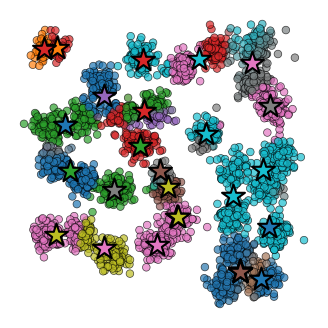

In [16]:
PlotClustering(X, Y, pi, figsize=(6, 4), save_path=None)